This is a very simple example of neural network. Its purpose is to approximate an unknown single valued function using a dense deep network. 
The user is invited to play with it, modifying:
1. the hidden function
2. the number of layers and neurons per layer
3. activation functions, number of epochs, and so on.

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


"myhiddenfunction" is the definition of the function you want to approximate by means of a neural network (NN). The definition is hidden to the NN, who can only access it as a blackbox, to get training samples. 
This is implemented by means of a generator (a special kind of function), taking in input a number (batchsize) and returning a pair of input output vectors of length batchsize. Each input is a random number in the interval [-pi,pi] and the output is computed by means of myhiddenfunction.

In [ ]:
def myhiddenfunction(x):
  #define your favourite function
  #output in range 0-1 if last activation is a sigmoid!
  return (np.sin(x)**2 + np.cos(x)/3 + 1)/3
  
def generator(batchsize):
    while True:
      inputs = np.random.uniform(low=-np.pi,high=np.pi,size=batchsize)
      outputs = np.zeros(batchsize)
      for i in range(0,batchsize):
          outputs[i] = myhiddenfunction(inputs[i])
      yield (inputs,outputs)

If you want to see an example of a generated batch, you need to invoke next on the generator

In [ ]:
print(next(generator(5)))

(array([ 0.2179868 , -1.43588043, -0.87048315,  2.34911888,  0.43271096]), array([0.45740509, 0.67558118, 0.59983133, 0.42434891, 0.4928171 ]))


Now we define the network. The function we want to approximate is single valued, so the network will have a single input and a single output, and its (dense) structure is completely defined by a 
list specifying the number of neurons per layer


In [ ]:
input_layer = Input(shape=(1,))
x = Dense(20, activation='relu')(input_layer)
x = Dense(30, activation='relu')(x)
x = Dense(20, activation='relu')(x)
output_layer = Dense(1,activation='relu')(x)

mymodel = Model(input_layer,output_layer)

Here is an alternative, more modular definition of the same network.

In [ ]:
# size of hidden layers (one for each of them)
inner_layers_dims = [20,30,20]

input_layer = Input(shape=(1,))
x = input_layer
for i in range(0,len(inner_layers_dims)):
  x = Dense(inner_layers_dims[i], activation='relu')(x)
output_layer = Dense(1, activation='relu')(x)

mymodel1 = Model(input_layer,output_layer)

We can now have a look at the model we just generated:

In [ ]:
mymodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,311
Trainable params: 1,311
Non-trainable params: 0
_________________________________________________________________
None


Try to be sure you correctly understand the number of learning parameters for each layer. 
For a dense layer with n input neurons and m output neurons, your have nxm weights + m biases.
For instance, for a 20-to-30 layer, we have 20x30+30 = 630 parameters.

We are finally ready to compile our model and train it.
As loss function we use mean square error (mse). 
The "optimizer" is the technique used to tune the learning rate during backpropagation: you may ignore it for the moment.

In [ ]:
mymodel.compile(optimizer='adam', loss='mse')

In [ ]:
batchsize = 64

mymodel.fit_generator(generator(batchsize), steps_per_epoch=1000, epochs=10)

If everything is working correctly, the loss should decrease during training.  
If it doesn't, it means that, for some reason, the network is not learning.

We are finally ready to check the result of the approximation. We plot the hidden function in red, 
and the approximation computed by the network in blu.

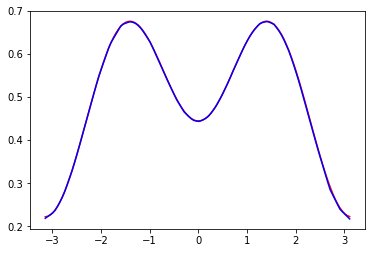

In [ ]:
x = np.arange(-np.pi,np.pi,0.05)
y = [myhiddenfunction(a) for a in x]
z = [z[0] for z in mymodel.predict(np.array(x))]
plt.plot(x,y,'r',x,z,'b')
plt.show()


Now is your turn. Modify:

1. the definition of the hidden function
2. the number of layers/neurons per layer; you just have to change inner_layers_dims in block 6.

Have fun.